# Stock Trader

## Load Packages

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from stocktrader.envs import ComplexTrader, SimpleTrader
from stocktrader.utils import PolicyNetwork, train_policy_gradient, set_seed
from stocktrader.stockdata import StockData

In [2]:
import mplcyberpunk
plt.style.use("cyberpunk")

### Load Data

In [3]:
df = pd.read_csv('./Processed Data/final_data.csv', parse_dates=['DateTime'])

### Stock Data

In [4]:
np.random.seed(100)

# Select random indices while maintaining sequential order
size = 10
random_indices = np.sort(np.random.choice(df.index, size=size, replace=False))

# Slice the DataFrame based on these sorted indices
sample_df = df.loc[random_indices].sort_values(by='DateTime')
stock_data = StockData(sample_df, n_stocks=2)

complex_trader = ComplexTrader(stock_data)

initial_state = complex_trader.reset()
print(f"Initial state shape: {initial_state.shape}")
input_size = len(initial_state)


Initial state shape: (26,)


## Policy Gradient

In [11]:

# Create a sample dataset for testing the models
np.random.seed(100)

# Select 1,000 random indices while maintaining sequential order
random_indices = np.sort(np.random.choice(df.index, size=100, replace=False))

# Slice the DataFrame based on these sorted indices
sample_data = df.loc[random_indices].sort_values(by='DateTime')

# Check the sample data
print(sample_data)

# Run the function to check different set of parameters
stock_data = StockData(sample_data)
complex_trader = ComplexTrader(stock_data)
initial_state = complex_trader.reset()


                   DateTime  Unnamed: 0_AMD  AMD_Open  AMD_High   AMD_Low  \
102756  2019-03-14 12:36:00         35214.0   23.1600   23.1800   23.1600   
117430  2019-03-24 17:10:00             NaN   26.3900   26.3900   26.3900   
127105  2019-03-31 10:25:00             NaN   25.5300   25.5300   25.5200   
139287  2019-04-08 21:27:00             NaN   28.4700   28.5000   28.4700   
170490  2019-04-30 13:30:00         57385.0   27.2700   27.2700   27.2500   
...                     ...             ...       ...       ...       ...   
2566739 2023-11-19 14:59:00             NaN  120.8900  120.8900  120.8900   
2603473 2023-12-15 03:13:00             NaN  137.4500  137.4800  137.4500   
2621189 2023-12-27 10:29:00        178552.0  143.8500  144.1400  143.8400   
2626640 2023-12-31 05:20:00             NaN  147.2799  147.2799  147.2799   
2701631 2024-02-21 07:11:00             NaN  163.3800  163.4500  163.3000   

         AMD_Close  AMD_Volume  S&P 500_AMD  NASDAQ-100_AMD  \
102756     2

Training Policy Gradient with ComplexTrader...
Episode 1: Total Reward: [2.05653637], Balance: [351.19749662], Net Worth: [7818841.27317579], Shares (AMD: 51712.735943685024, Nvidia: 409.8145839246926)
Episode 51: Total Reward: [2.02906311], Balance: [4296729.49800996], Net Worth: [7606956.12453997], Shares (AMD: 586.5290700144893, Nvidia: 6532.609288249618)
Episode 101: Total Reward: [0.99324242], Balance: [1319191.32702789], Net Worth: [2699974.74756604], Shares (AMD: 9304.94487566273, Nvidia: 20.976838389111293)
Episode 151: Total Reward: [1.57627216], Balance: [314377.09583047], Net Worth: [4836890.99516404], Shares (AMD: 7766.389295715055, Nvidia: 6846.364458965729)
Episode 201: Total Reward: [1.99235622], Balance: [1471050.52065985], Net Worth: [7332791.10101746], Shares (AMD: 34262.11597618922, Nvidia: 1652.7245503466256)
Episode 251: Total Reward: [1.32631376], Balance: [2621775.04388953], Net Worth: [3767131.19347683], Shares (AMD: 5041.765796850184, Nvidia: 816.2216559347191)

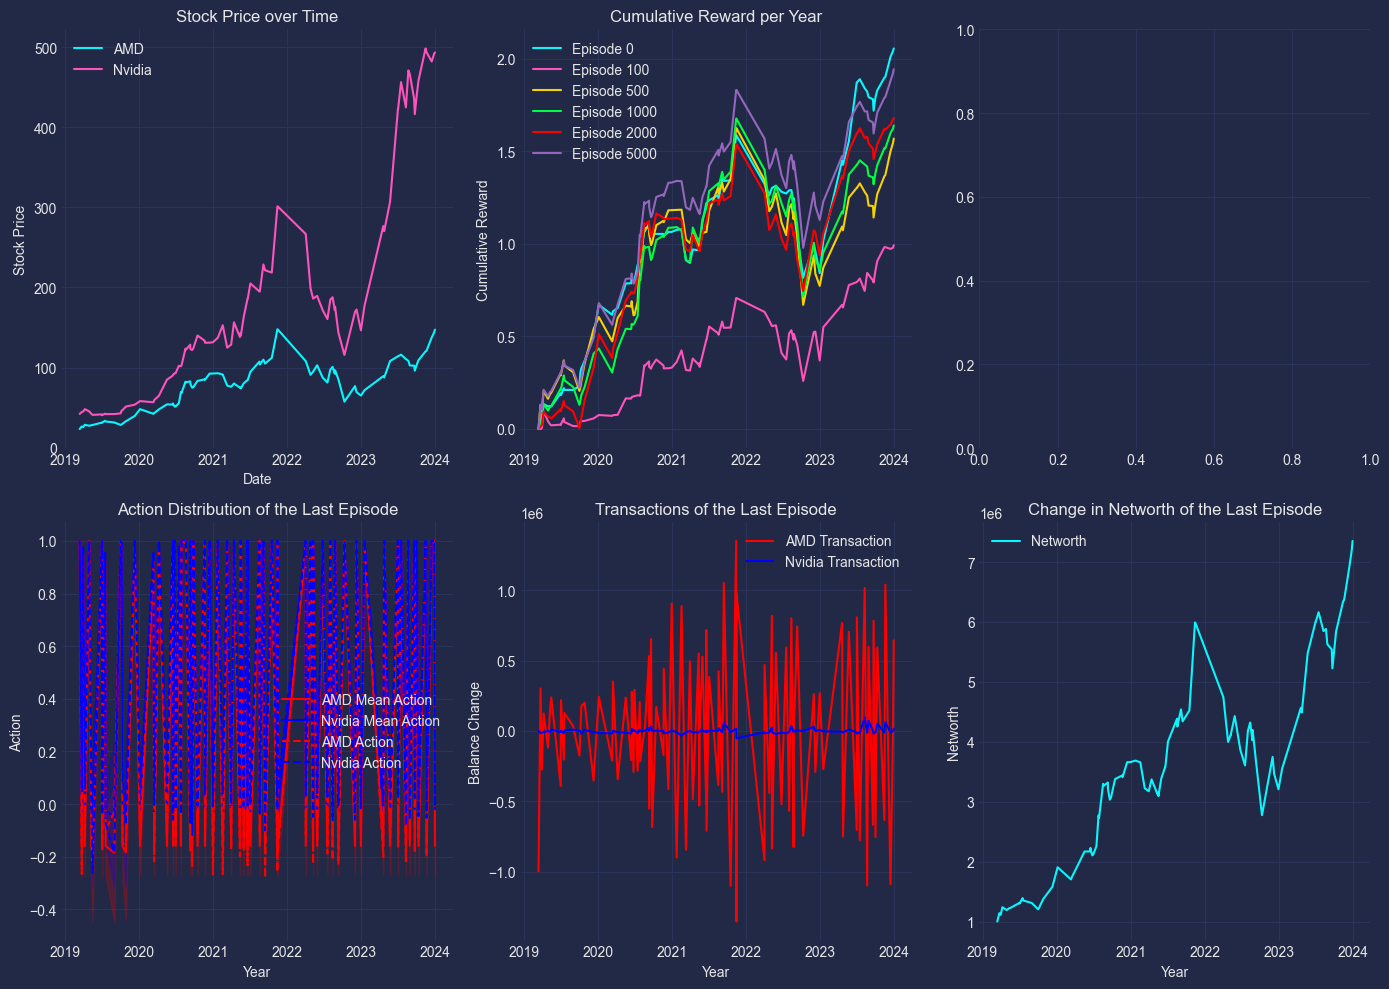

In [12]:
import torch.optim as optim

set_seed(1001)

hidden_size = 64
lr = 1e-3
exploratory_level = 0.2

output_size = stock_data.n_stocks

policy_network = PolicyNetwork(input_size, hidden_size, output_size, num_hidden_layers=2)
optimiser = optim.Adam(policy_network.parameters(), lr=lr)

print("Training Policy Gradient with ComplexTrader...")
train_policy_gradient(complex_trader, policy_network, optimiser, n_ep=5001, eps=exploratory_level, plot_episodes=[0,100, 500, 1000, 2000, 5000], no_action_penalty=1)
plt.show()

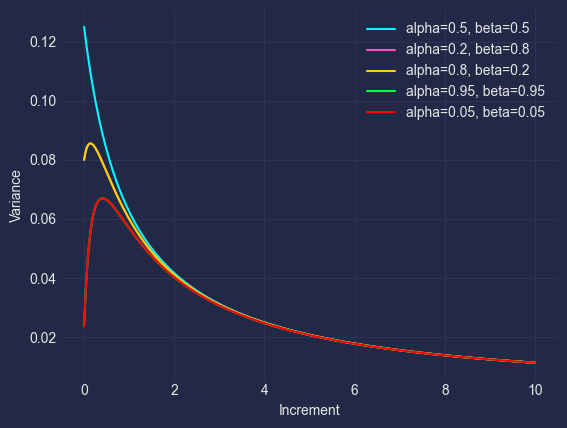

In [17]:
def compute_vars(alphas, betas):
    return alphas * betas / ((alphas + betas) ** 2 * (alphas + betas + 1))



increment = np.linspace(0, 10, 1000)

plt.plot(increment, compute_vars(0.5 + increment, 0.5 + increment), label = 'alpha=0.5, beta=0.5')
plt.plot(increment, compute_vars(0.2 + increment, 0.8 + increment), label = 'alpha=0.2, beta=0.8')
plt.plot(increment, compute_vars(0.8 + increment, 0.2 + increment), label = 'alpha=0.8, beta=0.2')
plt.plot(increment, compute_vars(0.05 + increment, 0.95 + increment), label = 'alpha=0.95, beta=0.95')
plt.plot(increment, compute_vars(0.95 + increment, 0.05 + increment), label = 'alpha=0.05, beta=0.05')



plt.xlabel('Increment')
plt.ylabel('Variance')

plt.legend()




##

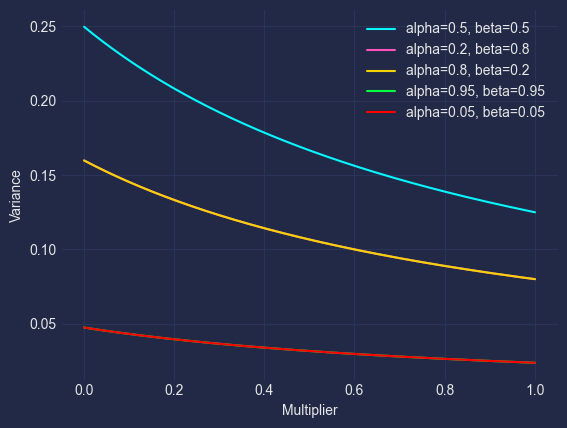

In [18]:
def compute_vars(alphas, betas):
    return alphas * betas / ((alphas + betas) ** 2 * (alphas + betas + 1))



increment = np.linspace(0.001, 1, 1000)

plt.plot(increment, compute_vars(0.5 * increment, 0.5 * increment), label = 'alpha=0.5, beta=0.5')
plt.plot(increment, compute_vars(0.2 * increment, 0.8 * increment), label = 'alpha=0.2, beta=0.8')
plt.plot(increment, compute_vars(0.8 * increment, 0.2 * increment), label = 'alpha=0.8, beta=0.2')
plt.plot(increment, compute_vars(0.05 * increment, 0.95 * increment), label = 'alpha=0.95, beta=0.95')
plt.plot(increment, compute_vars(0.95 * increment, 0.05 * increment), label = 'alpha=0.05, beta=0.05')



plt.xlabel('Multiplier')
plt.ylabel('Variance')

plt.legend()


